In [35]:
library(dplyr)
library("igraph")
library("RColorBrewer")

In [46]:
path = getwd()
path = substr(path, 1, nchar(path)-9)
#setwd(paste0(path, "data"))
getwd()

[1] "/Users/chen.liang/Desktop/变量/splc_analysis/data"

In [57]:
Nodes_Data = readRDS(file = "Temp/Nodes_Data.rds")[1:5]
Edges_Data = readRDS(file = "Temp/Edges_Data.rds")

Nodes_Data[0:1,]
Edges_Data[0:1,]

id,country,type_label,size,Type_color
Flex Ltd,US,Technology Hardware & Equipmen,3.5,2


to,from,weight
Applied Materials Inc,Flex Ltd,1


In [58]:
nrow(Nodes_Data)
nrow(Edges_Data)

[1] 463

[1] 2161

In [59]:
Nodes_Data$size=3
Edges_Data$weight=1
net <- graph_from_data_frame(d=Edges_Data, vertices=Nodes_Data, directed=T) 

In [121]:
l=layout_with_graphopt(net)

### Calculate Betweenness

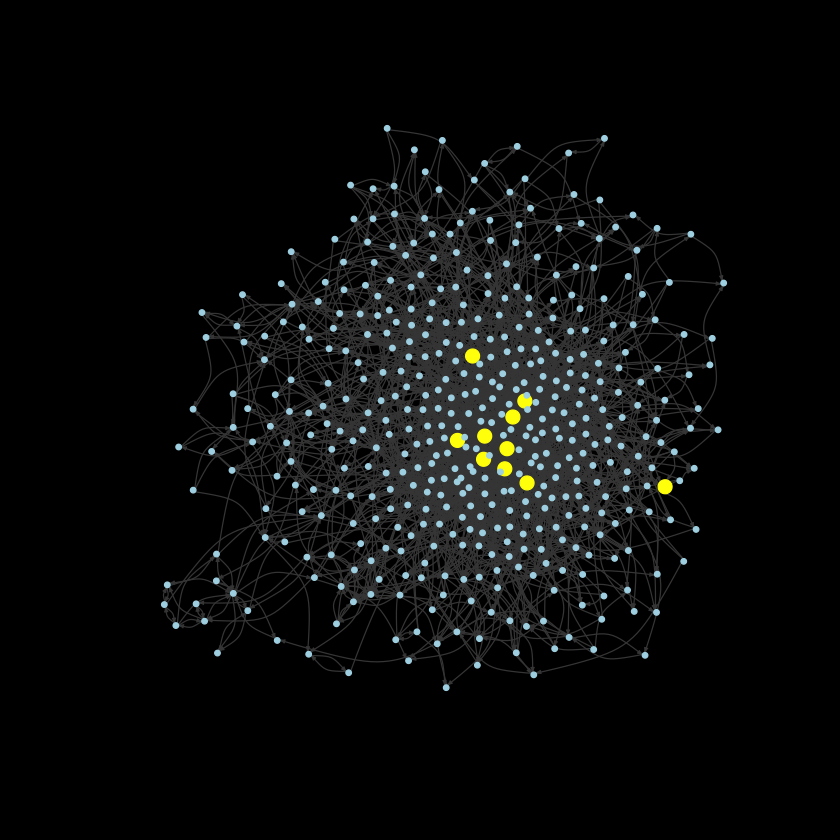

In [122]:
x=betweenness(net,normalized = T)

between_index=data.frame(names(x), round(as.numeric(x),4))
colnames(between_index)=c('Company','BC')
between_index$Country=NULL
for(i in 1:nrow(between_index)){
  between_index$Country[i]=as.character(Nodes_Data$country[which(between_index$Company[i]==Nodes_Data$id)])
}

top10 = as.character(between_index$Company)[1:10]
top10 = which(Nodes_Data$id %in% top10)

my_color=rep('lightblue',length(Nodes_Data$id))
my_color[top10]='yellow'

my_size = rep(2, length(Nodes_Data$id))
my_size[top10] = 5

par(bg="black")
plot(net, layout=l, edge.arrow.size=.2,main="Top 10 BC Marked",
     edge.color="grey27", vertex.size = my_size,
     vertex.label=NA, vertex.color=my_color,vertex.frame.color=my_color,
     edge.curved = TRUE
)


In [123]:
as.character(between_index$Company)[1:10]

[1] "Flex Ltd"                    "Celestica Inc"              
 [3] "MKS Instruments Inc"         "Ultra Clean Holdings Inc"   
 [5] "Micron Technology Inc"       "Murata Manufacturing Co Ltd"
 [7] "TDK Corp"                    "QUALCOMM Inc"               
 [9] "SMART Global Holdings Inc"   "Texas Instruments Inc"

In [124]:
country_list=between_index$Country[!duplicated(between_index$Country)]
sum=matrix(nrow = length(country_list))
num=matrix(nrow = length(country_list))
for(i in 1:length(country_list)){
  sum[i]=sum(between_index$BC[which(between_index$Country==country_list[i])])
  num[i]=length(which(between_index$Country==country_list[i]))
}

country_BC = data.frame(country_list, sum, num)
country_BC$avg=country_BC$sum/country_BC$num

In [125]:
# rank on avg
country_BC=country_BC[order(country_BC$avg),]
reversed = data.frame(rev(country_BC$country_list),
                      rev(country_BC$sum),
                      rev(country_BC$num),
                      round(rev(country_BC$avg),4))
colnames(reversed) = c('Country', "Sum", "Num", "Avg")
reversed[1:10,]

Country,Sum,Num,Avg
LU,0.0411,2,0.0206
DE,0.2511,23,0.0109
IL,0.0100,1,0.0100
KR,0.4568,59,0.0077
CN,0.2022,29,0.0070
JP,0.6647,104,0.0064
GB,0.0803,13,0.0062
FR,0.0600,11,0.0055
TW,0.2574,52,0.0050
US,0.5882,126,0.0047


In [126]:
# rank on sum
country_BC=country_BC[order(country_BC$sum),]
reversed = data.frame(rev(country_BC$country_list),
                      rev(country_BC$sum),
                      rev(country_BC$num),
                      round(rev(country_BC$avg),4))
colnames(reversed) = c('Country', "Sum", "Num", "Avg")
reversed[1:10,]

Country,Sum,Num,Avg
JP,0.6647,104,0.0064
US,0.5882,126,0.0047
KR,0.4568,59,0.0077
TW,0.2574,52,0.0050
DE,0.2511,23,0.0109
CN,0.2022,29,0.0070
GB,0.0803,13,0.0062
FR,0.0600,11,0.0055
LU,0.0411,2,0.0206
NL,0.0192,6,0.0032


### Label Central Companies

In [133]:
label_cen_com = function(l){
    company_id = c('Applied Materials Inc','ASML Holding NV','Lam Research Corp', 
                  'Tokyo Electron Ltd', 'Nikon Corp', 'Canon Inc', 
                  'Siltronic AG', 'SK Siltron Co Ltd', 'Shin-Etsu Chemical Co Ltd', 
                  'SUMCO Corp','Globalwafers Co Ltd',
                  'Samsung Electronics Co Ltd', 'SK Hynix Inc', 'Micron Technology Inc',
                  'Toshiba Corp','Western Digital Corp',
                  'Intel Corp','Advanced Micro Devices Inc', 'NVIDIA Corp',
                  'Taiwan Semiconductor Manufacturing Co Ltd','GLOBALFOUNDRIES Inc', 
                  'United Microelectronics Corp','Semiconductor Manufacturing International Corp')
    
    my_color=rep('lightblue',length(Nodes_Data$id))
    my_color[Nodes_Data$id %in% company_id]='yellow'

    my_size = rep(2, length(Nodes_Data$id))
    my_size[Nodes_Data$id %in% company_id] = 5
    
    par(bg="black")
    
    plot(net, layout=l, edge.arrow.size=.2,main="Mark Central Companies",
         edge.color="grey27", vertex.size = my_size,
         vertex.label=NA, vertex.color=my_color,vertex.frame.color=my_color,
         edge.curved = TRUE)
}

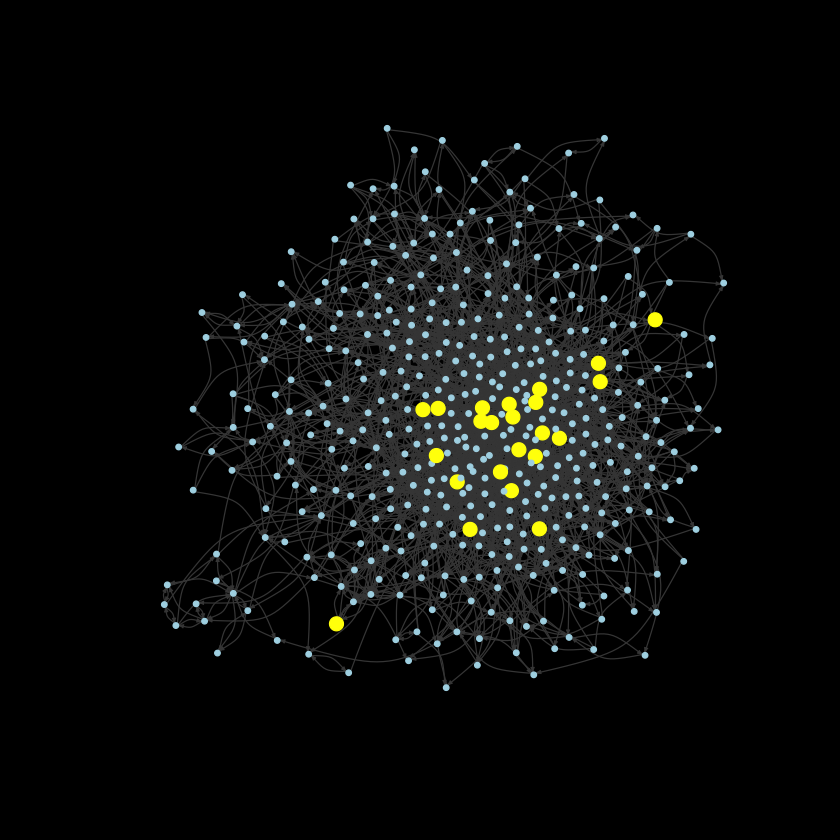

In [134]:
label_cen_com(l)